# Rice Leaf disease

This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

---Classes---

<li>Leaf smut
<li>Brown spot
<li>Bacterial leaf blight

# Installing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,cv2,glob
from zipfile import ZipFile
from shutil import copyfile
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

# Data Extraction

In [2]:
#Path of the jupyter file
path=os.getcwd()
path

'/content'

In [3]:
#Extracting the dataset
with ZipFile(os.path.join(path ,'Dataset.zip'),'r') as zipobject:
    zipobject.extractall()

# Train Test Split
<li>We are going to split train and test images into different folder.

In [4]:
#Splitting the data into train & test by making seperate directories & storing the data respectively.
train_dir = os.path.join(path,'train')
test_dir = os.path.join(path,'test')

#Creating directory for test & train images
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [5]:
#Number of classes in dataset
dir_list=os.listdir(os.path.join(path ,'Dataset'))
print('The Number of Classes in the Dataset is:{}'.format(len(dir_list)))

The Number of Classes in the Dataset is:3


**We are going to split train and test images into different folder.**

In [6]:
#Defining the split percent for train and test respectively.
train_ratio=0.75
test_ratio=0.25

#File path of dataset
source_dir = os.path.join(path ,'Dataset')

#list of all file present in the specified path
dir_list = os.listdir(source_dir)

for folder in dir_list:

    #File path
    data_dir = os.listdir(os.path.join(source_dir,folder))

    ##Modify a sequence in-place by shuffling its contents
    np.random.shuffle(data_dir)

    #creating folder for train image set
    os.makedirs(os.path.join(train_dir , folder), exist_ok=True)

    #creating folder for test image set
    os.makedirs(os.path.join(test_dir , folder), exist_ok=True)

    #Defining test ratio for train and test
    train_data = data_dir[:int(len(data_dir)*train_ratio+1)]
    test_data = data_dir[-int(len(data_dir)*test_ratio):]

    #copying image file from dataset to train set
    for image in train_data:
        copyfile(os.path.join(source_dir,folder,image) , os.path.join(train_dir,folder,image))

    #copying image file from dataset to test set
    for image in test_data:
        copyfile(os.path.join(source_dir,folder,image) , os.path.join(test_dir,folder,image))

# Split Data Check & Visualization

The Number of Classes in the Training Set:3
The Number Of Classes in the Testing Set:3

For Verification of the Split.....
The Number of Examples in the Class='Leaf smut' in the Dataset Directory:40
The Number of Examples in the Class='Leaf smut' in the Train Directory:31
The Number of Examples in the Class='Leaf smut' in the Test Directory:10


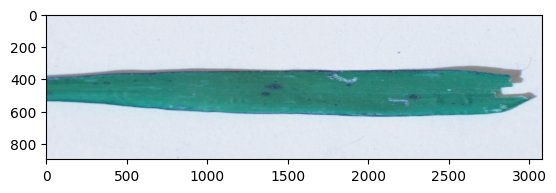

In [8]:
print("The Number of Classes in the Training Set:{}".format(len(os.listdir(train_dir))))
print("The Number Of Classes in the Testing Set:{}".format(len(os.listdir(test_dir))))
print('\nFor Verification of the Split.....')
print("The Number of Examples in the Class='Leaf smut' in the Dataset Directory:{}".format(len(os.listdir(os.path.join(source_dir,'Leaf smut')))))
print("The Number of Examples in the Class='Leaf smut' in the Train Directory:{}".format(len(os.listdir(os.path.join(train_dir,'Leaf smut')))))
print("The Number of Examples in the Class='Leaf smut' in the Test Directory:{}".format(len(os.listdir(os.path.join(test_dir,'Leaf smut')))))
path =cv2.imread('Dataset/Leaf smut/DSC_0293.JPG')
plt.imshow(path)
plt.show()

The Number of Classes in the Training Set:3
The Number Of Classes in the Testing Set:3

For Verification of the Split.....
The Number of Examples in the Class='Bacterial leaf blight' in the Dataset Directory:40
The Number of Examples in the Class='Bacterial leaf blight' in the Train Directory:31
The Number of Examples in the Class='Bacterial leaf blight' in the Test Directory:10


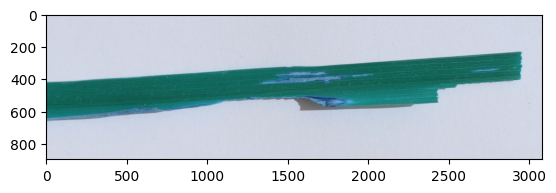

In [9]:
print("The Number of Classes in the Training Set:{}".format(len(os.listdir(train_dir))))
print("The Number Of Classes in the Testing Set:{}".format(len(os.listdir(test_dir))))
print('\nFor Verification of the Split.....')
print("The Number of Examples in the Class='Bacterial leaf blight' in the Dataset Directory:{}".format(len(os.listdir(os.path.join(source_dir,'Bacterial leaf blight')))))
print("The Number of Examples in the Class='Bacterial leaf blight' in the Train Directory:{}".format(len(os.listdir(os.path.join(train_dir,'Bacterial leaf blight')))))
print("The Number of Examples in the Class='Bacterial leaf blight' in the Test Directory:{}".format(len(os.listdir(os.path.join(test_dir,'Bacterial leaf blight')))))
path =cv2.imread('Dataset/Bacterial leaf blight/DSC_0365.JPG')
plt.imshow(path)
plt.show()

The Number of Classes in the Training Set:3
The Number Of Classes in the Testing Set:3

For Verification of the Split.....
The Number of Examples in the Class='Brown spot' in the Dataset Directory:40
The Number of Examples in the Class='Brown spot' in the Train Directory:31
The Number of Examples in the Class='Brown spot' in the Test Directory:10


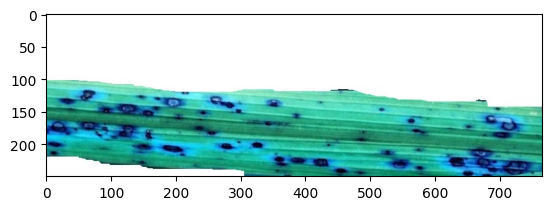

In [10]:
print("The Number of Classes in the Training Set:{}".format(len(os.listdir(train_dir))))
print("The Number Of Classes in the Testing Set:{}".format(len(os.listdir(test_dir))))
print('\nFor Verification of the Split.....')
print("The Number of Examples in the Class='Brown spot' in the Dataset Directory:{}".format(len(os.listdir(os.path.join(source_dir,'Brown spot')))))
print("The Number of Examples in the Class='Brown spot' in the Train Directory:{}".format(len(os.listdir(os.path.join(train_dir,'Brown spot')))))
print("The Number of Examples in the Class='Brown spot' in the Test Directory:{}".format(len(os.listdir(os.path.join(test_dir,'Brown spot')))))
path =cv2.imread('Dataset/Brown spot/DSC_0100.jpg')
plt.imshow(path)
plt.show()

# Data Augmentation
<ul>
    <li>Data augmentation is the process of modifying, or “augmenting” a dataset with additional data.
<li>Techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.

</ul>

In [11]:
rows=224  #Number of Pixels in the Rows
cols=224  #Number of Pixels in Columns

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 rotation_range=40,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)

#Iaugment images in real-time while model is still training
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images using train_datagen generator
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(rows,cols),
                                                  class_mode='categorical')

# Flow validation images using test_datagen generator
test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(rows,cols),
                                                class_mode='categorical')

Found 93 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


# Import The Base model

## MobileNetV2
<ul>
<li>MobileNet-v2 is a convolutional neural network that is 53 layers deep.
<li>The pretrained network can classify images into 1000 object categories.It is a very effective feature extractor for object detection and segmentation.
<li>It is based on an inverted residual structure where the residual connections are between the bottleneck layers.
</ul>

In [12]:
#Defining Pre-train model
trained_model=MobileNetV2(input_shape=(rows,cols,3),
                    include_top=False,
                    weights='imagenet')

#Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
trained_model.trainable=True

#model architecture
trained_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

# Callbacks
<ul>
<li>Callbacks are commands you can define that execute in response to a specific modeling action, such as opening a model or stopping a simulation.
</ul>

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98):
            print("\nCongralutions Model has reached 98% accuracy.")
            self.model.stop_training = True
callbacks=myCallback()

# CNN Model
<ul>
<li>Activation Function: A function that is added into an artificial neural network in order to help the network learn complex patterns in the data.Most used function are Sigmoid, ReLU, Leaky ReLU, tanh, Linear, Softmax and etc.
<li>In our case we will be use 'Softmax' activation function.softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.As model has 105 classes as output.
<li>Loss Function: It quantifies the difference between the expected outcome and the outcome produced by the machine learning model.Regression Loss Function,Mean Squared Error,Mean Squared Logarithmic Error Loss. Mean Absolute Error Loss,Binary Classification Loss Function,Binary Cross Entropy Loss.
<li>We will use Categorical crossentropy,it is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories(105 classes), and the model must decide which one.
<li>Optimizer: An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.Types of optimizer are Gradient Descent,Stochastic Gradient Descent,Adagrad,Adadelta,RMSprop,Adam.
<li>We will use Adam optimizer because the results are generally better than every other optimization algorithms, have faster computation time, can handle sparse gradients on noisy problems and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications
</ul>

In [14]:
#takes a tensor of size (input width) x (input height) x (input channels) and computes the average value of all
#  values across the entire (input width) x (input height) matrix for each of the (input channels).
x = tf.keras.layers.GlobalAveragePooling2D()(trained_model.output)

#Add a Dropout layer.
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final softmax layer for classification.
x = tf.keras.layers.Dense(3,activation='softmax')(x)

model = tf.keras.Model(trained_model.input,x)

#Compileing model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

#Summary of the model.
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 2,227,715 (8.50 MB)

 Non-trainable params: 34,112 (133.25 KB)

# Model Execution

In [15]:
#fitting model
result=model.fit(train_generator,
                 validation_data=test_generator,
                 epochs=100,
                 callbacks=[callbacks],
                 verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 58s 9s/step - accuracy: 0.4339 - loss: 1.3417 - val_accuracy: 0.2667 - val_loss: 1.4231
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.7417 - loss: 0.7359 - val_accuracy: 0.2667 - val_loss: 1.3476
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.6668 - loss: 0.7471 - val_accuracy: 0.4000 - val_loss: 1.2512
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.7517 - loss: 0.5786 - val_accuracy: 0.5000 - val_loss: 1.1351
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.9135 - loss: 0.3389 - val_accuracy: 0.6000 - val_loss: 1.0230
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.8847 - loss: 0.2985 - val_accuracy: 0.6333 - val_loss: 0.8981
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.9257 - loss: 0.2006 - val_accuracy: 0.7000 - val_loss: 0.7969
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 8s/step - accuracy: 0.9357 - loss: 0.1951 - val_accuracy: 0.7000 - val_loss: 0.7457


# Model Evalution and Testing

In [36]:
# Save model for later use
tf.keras.models.save_model(model,'model.h5')

In [37]:
from google.colab import files

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
from tensorflow.keras.models import load_model

#Loading model file
df = load_model('model.h5')


In [19]:
df.save_weights('my_model_weights.weights.h5')

## Test For Brown Spot Disease

In [21]:
#path of the image
path="Dataset/Brown spot/DSC_0104.jpg"
img=path

classes=train_generator.class_indices
class_names=list(classes.keys())   #List of the class names
img = tf.keras.preprocessing.image.load_img(
    path, target_size=(rows, cols)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array=img_array/255.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The Class of the Image is Brown Spot .


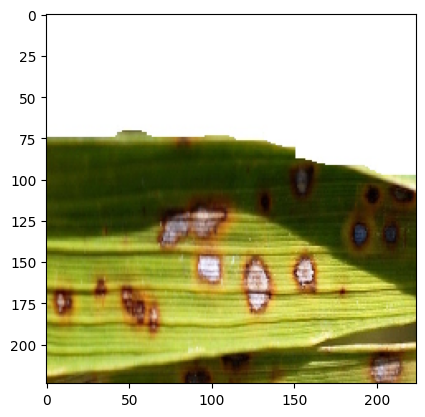

In [22]:
score = df.predict(img_array)


plt.imshow(img)
print("The Class of the Image is {} .".format(class_names[np.argmax(score)][:].title()))

## Test For Bacterial leaf blight Disease

In [23]:
#path of the image
path="Dataset/Bacterial leaf blight/DSC_0367.JPG"
img=path

classes=train_generator.class_indices
class_names=list(classes.keys())   #List of the class names
img = tf.keras.preprocessing.image.load_img(
    path, target_size=(rows, cols)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array=img_array/255.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The Class of the Image is Bacterial Leaf Blight .


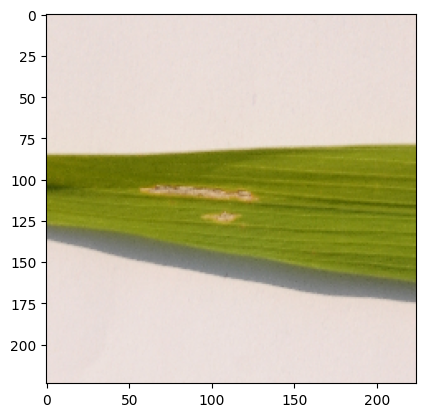

In [24]:
score = df.predict(img_array)


plt.imshow(img)
print("The Class of the Image is {} .".format(class_names[np.argmax(score)][:].title()))

## Testing for Leaf Smut Disease

In [30]:
import os

# Check current working directory
print(os.getcwd())

# Check if Python can see the file
print(os.path.exists("Dataset/Leaf smut/DSC_0513.JPG"))
print(os.listdir("Dataset/Leaf smut"))



/content
False
['DSC_0316.JPG', 'DSC_0515.jpg', 'DSC_0328.jpg', 'DSC_0308.JPG', 'DSC_0336.jpg', 'DSC_0503.jpg', 'DSC_0506.jpg', 'DSC_0317.JPG', 'DSC_0339.jpg', 'DSC_0327.JPG', 'DSC_0309.JPG', 'DSC_0511.jpg', 'DSC_0315.jpg', 'DSC_0322.jpg', 'DSC_0514.jpg', 'DSC_0312.JPG', 'DSC_0330.jpg', 'DSC_0513.jpg', 'DSC_0335.JPG', 'DSC_0314.JPG', 'DSC_0507.jpg', 'DSC_0504.jpg', 'DSC_0338.JPG', 'DSC_0320.JPG', 'DSC_0313.JPG', 'DSC_0318.JPG', 'DSC_0508.jpg', 'DSC_0502.jpg', 'DSC_0331.JPG', 'DSC_0310.JPG', 'DSC_0512.jpg', 'DSC_0516.jpg', 'DSC_0510.jpg', 'DSC_0500.jpg', 'DSC_0505.jpg', 'DSC_0319.jpg', 'DSC_0509.jpg', 'DSC_0321.JPG', 'DSC_0501.jpg', 'DSC_0293.JPG']


In [32]:
#path of the image
path="Dataset/Leaf smut/DSC_0512.jpg"
img=path

classes=train_generator.class_indices
class_names=list(classes.keys())   #List of the class names
img = tf.keras.preprocessing.image.load_img(
    path, target_size=(rows, cols)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array=img_array/255.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
The Class of the Image is Brown Spot .


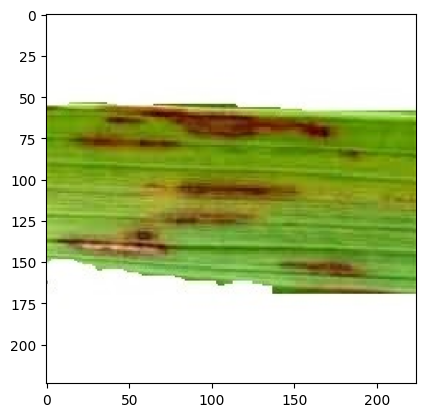

In [33]:
score = df.predict(img_array)


plt.imshow(img)
print("The Class of the Image is {} .".format(class_names[np.argmax(score)][:].title()))